## Data description

The data consists of 10 fields:

- Points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

- Variety: the type of grapes used to make the wine (ie Pinot Noir)

- Description: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.

- Country: the country that the wine is from

- Province: the province or state that the wine is from

- Region 1: the wine growing area in a province or state (ie Napa)

- Region 2: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

- Winery: the winery that made the wine

- Designation: the vineyard within the winery where the grapes that made the wine are from

- Price: the cost for a bottle of the wine

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

%matplotlib inline

In [2]:
wine_df = pd.read_csv('winemag_data_first150k.csv')
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Drop Duplicate Descriptions

In [3]:
wine_df.duplicated(subset='description').value_counts()

False    97821
True     53109
dtype: int64

In [4]:
wine_df.duplicated(subset=['description', 'variety']).value_counts() 

False    97830
True     53100
dtype: int64

### Duplicate sanity check


In [5]:
dup1 = wine_df.duplicated(subset=['description']) == False
dup1_tru = dup1[dup1]
dup1idx = set(dup1_tru.index)
len(dup1idx)

97821

In [6]:
dup2 = wine_df.duplicated(subset=['description', 'variety']) == False
dup2_tru = dup2[dup2]
dup2idx = set(dup2_tru.index)
dup2idx.difference(dup1idx)

{18649, 22897, 22906, 23671, 28960, 67041, 69503, 113861, 116488}

In [7]:
wine_df.description[18649]

"Gibilmoro, a pure expression of Nero d'Avola, sees some oak aging to shape aromas of toasted walnut, nutella and wood spice. In fact, not much of the natural fruit is left, and what is there feels jammy and ripe."

In [8]:
wine_df[wine_df.description=="Gibilmoro, a pure expression of Nero d'Avola, sees some oak aging to shape aromas of toasted walnut, nutella and wood spice. In fact, not much of the natural fruit is left, and what is there feels jammy and ripe."]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
18576,18576,Italy,"Gibilmoro, a pure expression of Nero d'Avola, ...",Gibilmoro,86,20.0,Sicily & Sardinia,Sicilia,NaN,Merlot,Di Prima
18649,18649,Italy,"Gibilmoro, a pure expression of Nero d'Avola, ...",Gibilmoro,86,20.0,Sicily & Sardinia,Sicilia,NaN,Nero d'Avola,Di Prima
59976,59976,Italy,"Gibilmoro, a pure expression of Nero d'Avola, ...",Gibilmoro,86,20.0,Sicily & Sardinia,Sicilia,NaN,Merlot,Di Prima
80136,80136,Italy,"Gibilmoro, a pure expression of Nero d'Avola, ...",Gibilmoro,86,20.0,Sicily & Sardinia,Sicilia,NaN,Merlot,Di Prima
80449,80449,Italy,"Gibilmoro, a pure expression of Nero d'Avola, ...",Gibilmoro,86,20.0,Sicily & Sardinia,Sicilia,NaN,Nero d'Avola,Di Prima


### The above wine should be classified as a 'Nero d'Avola' variety. 

In [10]:
for dup in dup2idx.difference(dup1idx):
    search = wine_df.description[dup]
    print(wine_df[wine_df.description == search])

       Unnamed: 0 country                                        description  \
28959       28959   Italy  If you've ever wondered what makes this wine s...   
28960       28960   Italy  If you've ever wondered what makes this wine s...   
78009       78009   Italy  If you've ever wondered what makes this wine s...   
78010       78010   Italy  If you've ever wondered what makes this wine s...   

      designation  points  price province            region_1 region_2  \
28959     Masseto      97  240.0  Tuscany             Toscana      NaN   
28960   Ornellaia      97  240.0  Tuscany  Bolgheri Superiore      NaN   
78009     Masseto      97  240.0  Tuscany             Toscana      NaN   
78010   Ornellaia      97  240.0  Tuscany  Bolgheri Superiore      NaN   

         variety                 winery  
28959     Merlot  Tenuta dell'Ornellaia  
28960  Red Blend  Tenuta dell'Ornellaia  
78009     Merlot  Tenuta dell'Ornellaia  
78010  Red Blend  Tenuta dell'Ornellaia  
        Unnamed: 0

In [11]:
wine_df = wine_df.drop_duplicates(subset=['description'], keep='last')
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97821 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     97821 non-null int64
country        97818 non-null object
description    97821 non-null object
designation    67935 non-null object
points         97821 non-null int64
price          89106 non-null float64
province       97818 non-null object
region_1       81895 non-null object
region_2       39481 non-null object
variety        97821 non-null object
winery         97821 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 9.0+ MB


In [12]:
wine_df.variety.value_counts()

Pinot Noir                       9283
Chardonnay                       9159
Cabernet Sauvignon               8267
Red Blend                        6484
Bordeaux-style Red Blend         5170
Sauvignon Blanc                  4034
Syrah                            3662
Riesling                         3582
Merlot                           3176
Zinfandel                        2408
Sangiovese                       2152
Malbec                           1967
Rosé                             1910
White Blend                      1857
Tempranillo                      1622
Portuguese Red                   1440
Nebbiolo                         1339
Sparkling Blend                  1315
Shiraz                           1254
Corvina, Rondinella, Molinara    1118
Rhône-style Red Blend            1046
Pinot Gris                        899
Cabernet Franc                    883
Sangiovese Grosso                 870
Viognier                          859
Bordeaux-style White Blend        856
Pinot Grigio

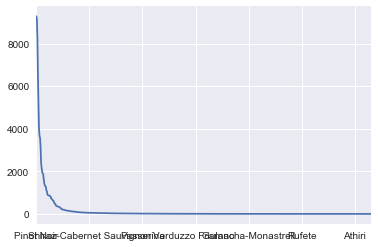

In [13]:
wine_df.variety.value_counts().plot();

In [4]:
wine_df.nunique()

Unnamed: 0     97821
country           48
description    97821
designation    30616
points            21
price            357
province         455
region_1        1236
region_2          18
variety          632
winery         14810
dtype: int64

### How many null values are we willing to replace to keep a feature? 
The "Unnamed" column is a replica of the index, the "designation" column had approx 30K null values, the "region_2" column has nearly 60K. 

In [14]:
wine_df = wine_df.drop(['Unnamed: 0', 'designation', 'region_2'], axis=1)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97821 entries, 0 to 150929
Data columns (total 8 columns):
country        97818 non-null object
description    97821 non-null object
points         97821 non-null int64
price          89106 non-null float64
province       97818 non-null object
region_1       81895 non-null object
variety        97821 non-null object
winery         97821 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 6.7+ MB


In [15]:
# Price is our only continous feature (points could be considered ordinal 80-100)
# From previous iterations, if we dont replace nan values here, we will be left with 74586 datapoints after dropna
wine_df.price = wine_df.price.fillna(wine_df.price.mean()) 
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97821 entries, 0 to 150929
Data columns (total 8 columns):
country        97818 non-null object
description    97821 non-null object
points         97821 non-null int64
price          97821 non-null float64
province       97818 non-null object
region_1       81895 non-null object
variety        97821 non-null object
winery         97821 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 6.7+ MB


### Do we try and keep 97821 datapoints by replacing nan values in the "region_1" column?
### or do we drop nan values at this point; keep 81895 datapoints?


In [16]:
# wine_df.region_1 = wine_df.region_1.fillna(" ")
# wine_df.info()
wine_df = wine_df.dropna()
full_data = len(wine_df)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81895 entries, 0 to 150929
Data columns (total 8 columns):
country        81895 non-null object
description    81895 non-null object
points         81895 non-null int64
price          81895 non-null float64
province       81895 non-null object
region_1       81895 non-null object
variety        81895 non-null object
winery         81895 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 5.6+ MB


In [17]:
greater = wine_df.variety.value_counts() >= 50

greater_tru = greater[greater==True]

greaterthan50 = list(greater_tru.index)
print("Number of varities with at least 50 datapoints: {}".format(len(greaterthan50)))
print()
print("Top 10 most common varieties: \n{}".format(greaterthan50[:10]))

Number of varities with at least 50 datapoints: 94

Top 10 most common varieties: 
['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Syrah', 'Merlot', 'Sauvignon Blanc', 'Zinfandel', 'Sangiovese']


In [18]:
wine_df.variety = wine_df.variety.apply(lambda x:x if x in greaterthan50 else 'Other')
wine_df.head()

,country,description,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,Other,Domaine de la Bégude


In [19]:
wine_50_df = wine_df[wine_df.variety!='Other']
wine_50_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78718 entries, 0 to 150929
Data columns (total 8 columns):
country        78718 non-null object
description    78718 non-null object
points         78718 non-null int64
price          78718 non-null float64
province       78718 non-null object
region_1       78718 non-null object
variety        78718 non-null object
winery         78718 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 5.4+ MB


In [20]:
percent_total = (len(wine_50_df)/full_data) * 100
print("After dropping varieties with less than 50 datapoints, we still retain {:.2f}% of the dataset.".format(percent_total))


After dropping varieties with less than 50 datapoints, we still retain 96.12% of the dataset.


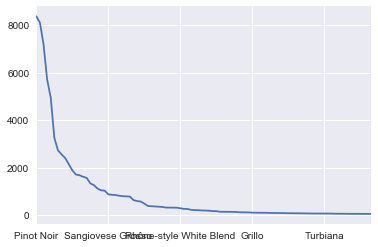

In [21]:
wine_50_df.variety.value_counts().plot();

## Set target (y-values) = 'variety'

In [22]:
target = wine_50_df['variety']
target.head()

0    Cabernet Sauvignon
1         Tinta de Toro
2       Sauvignon Blanc
3            Pinot Noir
5         Tinta de Toro
Name: variety, dtype: object

In [23]:
target.shape

(78718,)

In [24]:
target.nunique()

94

In [25]:
# one-hot-encode the varieties 
y = pd.get_dummies(target)
y.head()

,Aglianico,Albariño,Barbera,Bonarda,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Blend,Cabernet Franc,Cabernet Sauvignon,Cabernet Sauvignon-Merlot,...,Tinto del Pais,Torrontés,Turbiana,Verdejo,Vermentino,Vernaccia,Viognier,Viura,White Blend,Zinfandel
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clean up dataframe to create two matrices:
## 1) Matrix with only the descriptions: X_text 
## 2) Matrix with the remaining features: X_feat

In [26]:
X_text = wine_50_df.description
X_text.head()

0    This tremendous 100% varietal wine hails from ...
1    Ripe aromas of fig, blackberry and cassis are ...
2    Mac Watson honors the memory of a wine once ma...
3    This spent 20 months in 30% new French oak, an...
5    Deep, dense and pure from the opening bell, th...
Name: description, dtype: object

In [27]:
# After extracting and saving the wine varieties as our target vector, remove columns
X_feat = wine_50_df.drop(['description','variety'], axis=1)
X_feat.head()

,country,points,price,province,region_1,winery
0,US,96,235.0,California,Napa Valley,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Ponzi
5,Spain,95,73.0,Northern Spain,Toro,Numanthia


In [28]:
X_feat.nunique()

country         7
points         21
price         332
province       61
region_1     1174
winery      12483
dtype: int64

In [29]:
X_feat.describe()

,points,price
count,78718.000000,78718.000000
mean,88.057153,35.280775
std,3.275378,36.869167
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,29.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


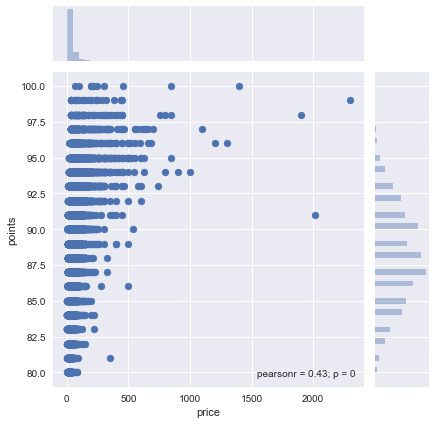

In [30]:
sns.jointplot(x="price", y="points", data=X_feat);

In [31]:
X_feat.price = np.log(X_feat.price)
X_feat.describe()

,points,price
count,78718.000000,78718.000000
mean,88.057153,3.331695
std,3.275378,0.636374
min,80.000000,1.386294
25%,86.000000,2.890372
50%,88.000000,3.367296
75%,90.000000,3.688879
max,100.000000,7.740664


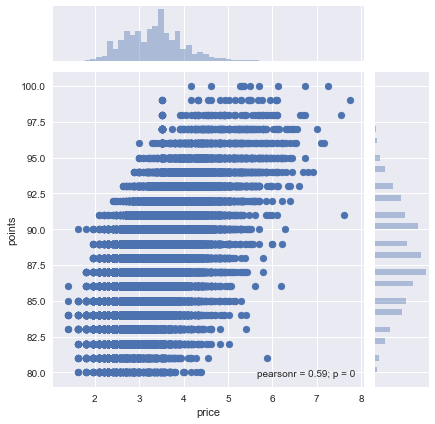

In [32]:
sns.jointplot(x="price", y="points", data=X_feat);

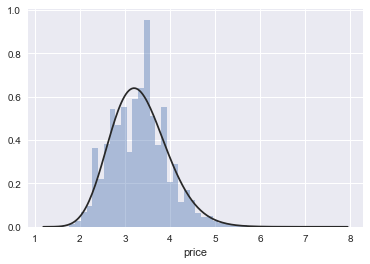

In [33]:
sns.distplot(X_feat.price, kde=False, fit=stats.gamma);

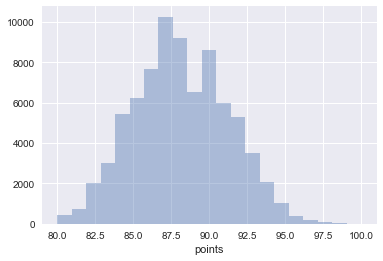

In [34]:
sns.distplot(X_feat.points, bins=21, kde=False);

In [35]:
pnts_mean, pnts_std = X_feat.points.mean(), X_feat.points.std()
pnts_mean, pnts_std

(88.057153382961971, 3.2753778780918599)

In [36]:
price_mean, price_std = X_feat.price.mean(), X_feat.price.std()
price_mean, price_std

(3.3316945017237605, 0.63637441319449484)

In [37]:
X_feat.points = (X_feat.points - pnts_mean) / pnts_std

In [38]:
X_feat.price = (X_feat.price - price_mean) / price_std

In [39]:
X_feat.describe()

,points,price
count,7.871800e+04,7.871800e+04
mean,-1.691192e-15,-4.765957e-16
std,1.000000e+00,1.000000e+00
min,-2.459916e+00,-3.057006e+00
25%,-6.280660e-01,-6.934954e-01
50%,-1.744940e-02,5.594400e-02
75%,5.931672e-01,5.612811e-01
max,3.646250e+00,6.928264e+00


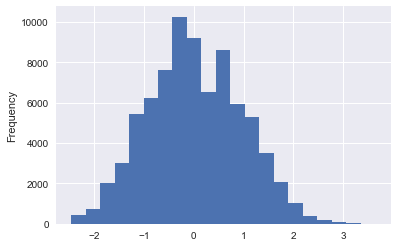

In [40]:
X_feat.points.plot.hist(bins=21);

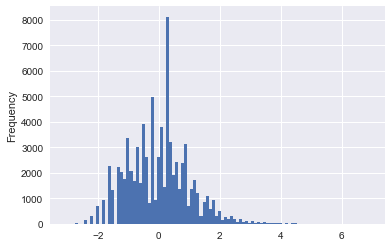

In [41]:
X_feat.price.plot.hist(bins=100);

In [42]:
X_feat.shape

(78718, 6)

In [43]:
# One-hot-encode all categorical variables
X_feat = pd.get_dummies(X_feat)
X_feat.head()

,points,price,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,...,winery_un4seen,winery_Ànima Negra,winery_Árido,winery_Ébano,winery_Écluse,winery_Élevée Winegrowers,winery_Éric & Jöel Durand,winery_Ñandú,winery_àMaurice,winery_áster
0,2.425017,3.343772,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.425017,2.150913,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.425017,1.835578,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.425017,1.324209,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2.119709,1.506605,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_feat.shape

(78718, 13727)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62974, 13727), (15744, 13727), (62974, 94), (15744, 94))

In [37]:
baseline_cluster = KMeans(n_clusters=94, random_state=42, verbose=1, n_jobs=-1)

In [38]:
baseline_cluster.fit(X_train[:1000])

Initialization complete
Initialization complete
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 1874.25600398
start iteration
done sorting
Iteration 0, inertia 1879.18021304
start iteration
done sorting
Iteration 0, inertia 1874.49808563
start iteration
done sorting
Iteration 0, inertia 1884.44272896
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 1, inertia 1827.34187075
start iteration
done sorting
Iteration 1, inertia 1845.85466938
start iteration
done sorting
Iteration 1, inertia 1826.77906994
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 1, inertia 1832.20997322
start iteration
done sorting
Iteration 2, inertia 1807.66307946
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, iner

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=94, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=1)

In [39]:
baseline_cluster.labels_[:10]

array([43,  6, 15, 56,  2, 24, 39, 63, 30, 52], dtype=int32)

In [40]:
import numpy as np
y_train_vals = np.array(y_train)
_, y_train_idx = np.where(y_train_vals>0) # column value == variety
y_train_idx

array([63, 12,  8, ..., 73, 12, 44])

In [41]:
np.sum(y_train_idx[:1000]==baseline_cluster.labels_)

8

In [42]:
y_test_vals = np.array(y_test)
_, y_test_idx = np.where(y_test_vals>0)
y_test_idx

array([ 2,  4, 38, ..., 46, 16,  3])

In [43]:
y_pred = baseline_cluster.predict(X_test[:1000])
np.sum(y_pred == y_test_idx[:1000])

3

In [44]:
baseline_cluster.score(X_test[:1000], y_test[:1000])

-2569.0224561603577

In [46]:
baseline2_cluster = KMeans(n_clusters=94, random_state=42, verbose=1)
baseline2_cluster.fit(X_train[:10000])

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21390.3813987
start iteration
done sorting
end inner loop
Iteration 1, inertia 20319.4337199
start iteration
done sorting
end inner loop
Iteration 2, inertia 20052.252556
start iteration
done sorting
end inner loop
Iteration 3, inertia 19960.7085715
start iteration
done sorting
end inner loop
Iteration 4, inertia 19910.8197531
start iteration
done sorting
end inner loop
Iteration 5, inertia 19877.0087003
start iteration
done sorting
end inner loop
Iteration 6, inertia 19862.6888946
start iteration
done sorting
end inner loop
Iteration 7, inertia 19849.6204996
start iteration
done sorting
end inner loop
Iteration 8, inertia 19831.6004426
start iteration
done sorting
end inner loop
Iteration 9, inertia 19797.6696189
start iteration
done sorting
end inner loop
Iteration 10, inertia 19788.6701056
start iteration
done sorting
end inner loop
Iteration 11, inertia 19785.0754292
start iteration
done sortin

Iteration 19, inertia 19990.5033016
start iteration
done sorting
end inner loop
Iteration 20, inertia 19986.3533254
start iteration
done sorting
end inner loop
Iteration 21, inertia 19984.7046683
start iteration
done sorting
end inner loop
Iteration 22, inertia 19982.3665692
start iteration
done sorting
end inner loop
Iteration 23, inertia 19979.1952748
start iteration
done sorting
end inner loop
Iteration 24, inertia 19978.1141971
start iteration
done sorting
end inner loop
Iteration 25, inertia 19977.1936094
start iteration
done sorting
end inner loop
Iteration 26, inertia 19976.0604282
start iteration
done sorting
end inner loop
Iteration 27, inertia 19975.7214728
start iteration
done sorting
end inner loop
Iteration 28, inertia 19975.7214728
center shift 0.000000e+00 within tolerance 4.071787e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21281.3999371
start iteration
done sorting
end inner loop
Iteration 1, inertia 20300.5538338
start 

Iteration 8, inertia 19939.5447054
start iteration
done sorting
end inner loop
Iteration 9, inertia 19927.3957403
start iteration
done sorting
end inner loop
Iteration 10, inertia 19905.9869741
start iteration
done sorting
end inner loop
Iteration 11, inertia 19875.1667543
start iteration
done sorting
end inner loop
Iteration 12, inertia 19863.5959525
start iteration
done sorting
end inner loop
Iteration 13, inertia 19861.253969
start iteration
done sorting
end inner loop
Iteration 14, inertia 19859.5955023
start iteration
done sorting
end inner loop
Iteration 15, inertia 19858.5832458
start iteration
done sorting
end inner loop
Iteration 16, inertia 19857.9048918
start iteration
done sorting
end inner loop
Iteration 17, inertia 19857.5958368
start iteration
done sorting
end inner loop
Iteration 18, inertia 19857.3462697
start iteration
done sorting
end inner loop
Iteration 19, inertia 19856.8130349
start iteration
done sorting
end inner loop
Iteration 20, inertia 19856.5791237
start i

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=94, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=1)

In [47]:
np.sum(y_train_idx[:10000]==baseline2_cluster.labels_)

97

In [48]:
y_pred = baseline2_cluster.predict(X_test[:10000])
np.sum(y_pred == y_test_idx[:10000])

105

In [49]:
baseline2_cluster.score(X_test[:10000], y_test[:10000])

-20581.356485875156

In [ ]:
baseline3_cluster = KMeans(n_clusters=94, random_state=42, verbose=1)
baseline3_cluster.fit(X_train)

Initialization complete
